In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [2]:
df=pd.read_csv("train.csv")
test=pd.read_csv('test.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [4]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [5]:
df.dropna(inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48660 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           48660 non-null  int64  
 1   department            48660 non-null  object 
 2   region                48660 non-null  object 
 3   education             48660 non-null  object 
 4   gender                48660 non-null  object 
 5   recruitment_channel   48660 non-null  object 
 6   no_of_trainings       48660 non-null  int64  
 7   age                   48660 non-null  int64  
 8   previous_year_rating  48660 non-null  float64
 9   length_of_service     48660 non-null  int64  
 10  KPIs_met >80%         48660 non-null  int64  
 11  awards_won?           48660 non-null  int64  
 12  avg_training_score    48660 non-null  int64  
 13  is_promoted           48660 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.6+ MB


In [7]:
male=pd.get_dummies(df['gender'],drop_first=True)

In [8]:
df.drop(['gender'],axis=1,inplace=True)

In [9]:
df=pd.concat([df,male],axis=1)

In [10]:
df.drop(['employee_id','department','region','recruitment_channel'],axis=1,inplace=True)

In [11]:
df.replace(to_replace=["Bachelor's"],value=1,inplace=True)
df.replace(to_replace=['Below Secondary'],value=2,inplace=True)
df.replace(to_replace=["Master's & above"],value=3,inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48660 entries, 0 to 54807
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   education             48660 non-null  int64  
 1   no_of_trainings       48660 non-null  int64  
 2   age                   48660 non-null  int64  
 3   previous_year_rating  48660 non-null  float64
 4   length_of_service     48660 non-null  int64  
 5   KPIs_met >80%         48660 non-null  int64  
 6   awards_won?           48660 non-null  int64  
 7   avg_training_score    48660 non-null  int64  
 8   is_promoted           48660 non-null  int64  
 9   m                     48660 non-null  uint8  
dtypes: float64(1), int64(8), uint8(1)
memory usage: 3.8 MB


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [14]:
male=pd.get_dummies(test['gender'],drop_first=True)

In [15]:
test.drop(['gender'],axis=1,inplace=True)

In [16]:
test=pd.concat([test,male],axis=1)

In [17]:
test.drop(['employee_id','department','region','recruitment_channel'],axis=1,inplace=True)

In [18]:
test.replace(to_replace=["Bachelor's"],value=1,inplace=True)
test.replace(to_replace=['Below Secondary'],value=2,inplace=True)
test.replace(to_replace=["Master's & above"],value=3,inplace=True)

In [19]:
test['education'].mode()

0    1.0
dtype: float64

In [20]:
test['previous_year_rating'].mode()

0    3.0
dtype: float64

In [21]:
test['previous_year_rating'].replace(np.nan,3,inplace=True)
test['education'].replace(np.nan,1,inplace=True)

In [22]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   education             23490 non-null  float64
 1   no_of_trainings       23490 non-null  int64  
 2   age                   23490 non-null  int64  
 3   previous_year_rating  23490 non-null  float64
 4   length_of_service     23490 non-null  int64  
 5   KPIs_met >80%         23490 non-null  int64  
 6   awards_won?           23490 non-null  int64  
 7   avg_training_score    23490 non-null  int64  
 8   m                     23490 non-null  uint8  
dtypes: float64(2), int64(6), uint8(1)
memory usage: 1.5 MB


In [23]:
df.head()

,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,m
0,3,1,35,5.0,8,1,0,49,0,0
1,1,1,30,5.0,4,0,0,60,0,1
2,1,1,34,3.0,7,0,0,50,0,1
3,1,2,39,1.0,10,0,0,50,0,1
4,1,1,45,3.0,2,0,0,73,0,1


In [24]:
test.head()

,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,m
0,1.0,1,24,3.0,1,1,0,77,1
1,1.0,1,31,3.0,5,0,0,51,0
2,1.0,1,31,1.0,4,0,0,47,1
3,1.0,3,31,2.0,9,0,0,65,0
4,1.0,1,30,4.0,7,0,0,61,1


In [25]:
X=df.drop(['is_promoted'], axis=1).values
y=df['is_promoted'].values

In [26]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=10)

In [27]:
# Logestic
log_reg=LogisticRegression(random_state=0)
log_reg.fit(X_train, y_train)

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(random_state=0)

In [28]:
y_predict_train=log_reg.predict(X_train)

In [29]:
cm=confusion_matrix(y_train, y_predict_train)

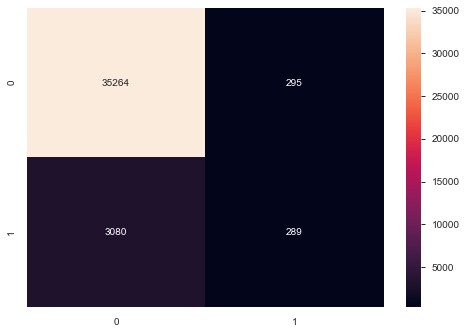

In [30]:
sns.heatmap(cm, annot=True, fmt='d')

In [31]:
print(classification_report(y_train, y_predict_train))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     35559
           1       0.49      0.09      0.15      3369

    accuracy                           0.91     38928
   macro avg       0.71      0.54      0.55     38928
weighted avg       0.88      0.91      0.88     38928



In [32]:
y_predict=log_reg.predict(X_test)

In [33]:
cm=confusion_matrix(y_test, y_predict)

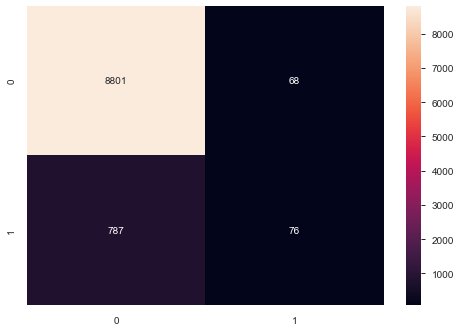

In [34]:
sns.heatmap(cm, annot=True, fmt='d')

In [35]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      8869
           1       0.53      0.09      0.15       863

    accuracy                           0.91      9732
   macro avg       0.72      0.54      0.55      9732
weighted avg       0.88      0.91      0.88      9732



In [36]:
# Grid Search
param_grid={
    'penalty':['l2'],
    'C':np.logspace(-4,4,20),
    'solver':['liblinear', 'newton-cg','sag', 'saga']
}

In [37]:
clf=GridSearchCV(log_reg, param_grid=param_grid, cv=10, verbose=True, n_jobs=-1)

In [38]:
best_clf=clf.fit(X_train, y_train)

Fitting 10 folds for each of 80 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   21.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:  7.3min finished


In [39]:
print(best_clf.best_params_)

{'C': 0.03359818286283781, 'penalty': 'l2', 'solver': 'newton-cg'}


In [40]:
y_predict=best_clf.predict(X_test)

In [41]:
cm=confusion_matrix(y_test, y_predict)

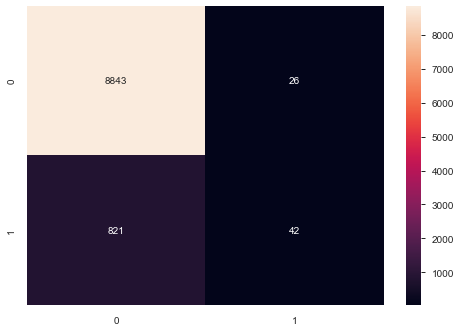

In [42]:
sns.heatmap(cm,annot=True,fmt='d')

In [43]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.92      1.00      0.95      8869
           1       0.62      0.05      0.09       863

    accuracy                           0.91      9732
   macro avg       0.77      0.52      0.52      9732
weighted avg       0.89      0.91      0.88      9732



# XGBoost Classifier

In [44]:
import xgboost as xgb

In [45]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score
# import packages for hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, KFold, GridSearchCV
from sklearn.metrics import f1_score, roc_auc_score,accuracy_score,confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report 

In [46]:
X_train = X_train.astype('int')
X_test = X_test.astype('int')

In [47]:
space={ 'max_depth': hp.quniform("max_depth", 3,18,1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 300,
        'seed': 0
      }

In [48]:
def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    y_predict = clf.predict(X_test)
    y_score = clf.predict_proba(X_test)[:,1]
    accuracy = accuracy_score(y_test, y_predict>0.5)
    Roc_Auc_Score = roc_auc_score(y_test, y_score)
    print ("ROC-AUC Score:",Roc_Auc_Score)
    print ("SCORE:", accuracy)
    return {'loss': -Roc_Auc_Score, 'status': STATUS_OK }


In [49]:
trials = Trials()

In [50]:

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

ROC-AUC Score:                                                                                                         
0.8125352187570674                                                                                                     
SCORE:                                                                                                                 
0.9199547883271681                                                                                                     
ROC-AUC Score:                                                                                                         
0.8112011358322705                                                                                                     
SCORE:                                                                                                                 
0.9161528976572133                                                                                                     
ROC-AUC Score:                          

ROC-AUC Score:                                                                                                         
0.8116140600398722                                                                                                     
SCORE:                                                                                                                 
0.9161528976572133                                                                                                     
ROC-AUC Score:                                                                                                         
0.8107705736661097                                                                                                     
SCORE:                                                                                                                 
0.9199547883271681                                                                                                     
ROC-AUC Score:                          

ROC-AUC Score:                                                                                                         
0.8127269498991827                                                                                                     
SCORE:                                                                                                                 
0.9127620221948212                                                                                                     
ROC-AUC Score:                                                                                                         
0.8113615759293865                                                                                                     
SCORE:                                                                                                                 
0.9161528976572133                                                                                                     
ROC-AUC Score:                          

ROC-AUC Score:                                                                                                         
0.8095781823417383                                                                                                     
SCORE:                                                                                                                 
0.9196465269214961                                                                                                     
ROC-AUC Score:                                                                                                         
0.8119508797225797                                                                                                     
SCORE:                                                                                                                 
0.9152281134401973                                                                                                     
ROC-AUC Score:                          

ROC-AUC Score:                                                                                                         
0.8121793892745797                                                                                                     
SCORE:                                                                                                                 
0.9199547883271681                                                                                                     
ROC-AUC Score:                                                                                                         
0.8118872524202219                                                                                                     
SCORE:                                                                                                                 
0.9199547883271681                                                                                                     
ROC-AUC Score:                          

ROC-AUC Score:                                                                                                         
0.8101280946941493                                                                                                     
SCORE:                                                                                                                 
0.9196465269214961                                                                                                     
ROC-AUC Score:                                                                                                         
0.8105013661578792                                                                                                     
SCORE:                                                                                                                 
0.91563912864776                                                                                                       
ROC-AUC Score:                          

In [51]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.9065236716299362, 'gamma': 1.3669657064891148, 'max_depth': 4.0, 'min_child_weight': 3.0, 'reg_alpha': 69.0, 'reg_lambda': 0.2957844469269842}


In [52]:
xgb_model=xgb.XGBClassifier(n_estimators = space['n_estimators'], max_depth = 4, gamma = 1.3669657064891148, reg_lambda = 0.2957844469269842,
                            reg_alpha = 69.0, min_child_weight=3.0,colsample_bytree = 0.9065236716299362 )
    

In [53]:
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9065236716299362,
              gamma=1.3669657064891148, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=4, min_child_weight=3.0, missing=nan,
              monotone_constraints='()', n_estimators=300, n_jobs=0,
              num_parallel_tree=1, random_state=0, reg_alpha=69.0,
              reg_lambda=0.2957844469269842, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [54]:
y_predict=xgb_model.predict(X_test)

In [55]:
cm=confusion_matrix(y_test, y_predict)

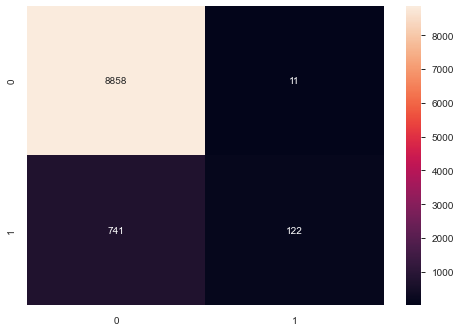

In [56]:
sns.heatmap(cm,annot=True,fmt='d')

In [57]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      8869
           1       0.92      0.14      0.24       863

    accuracy                           0.92      9732
   macro avg       0.92      0.57      0.60      9732
weighted avg       0.92      0.92      0.90      9732



In [40]:
test=test.astype('int').values

In [42]:
y_predict = xgb_model.predict(test)

In [43]:
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [44]:
y_predict.shape

(23490,)

In [45]:
predict=pd.DataFrame(data=y_predict)

# SMOTE

In [67]:
from imblearn.over_sampling import SMOTE

In [61]:
df['is_promoted'].value_counts()

0    44428
1     4232
Name: is_promoted, dtype: int64

In [64]:
X=np.array(df.loc[:, df.columns != 'is_promoted'])
y=np.array(df.loc[:, df.columns=='is_promoted'])

In [65]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.30, random_state=0)

In [68]:
sm=SMOTE(random_state=2)

In [69]:
X_train_res, y_train_res=sm.fit_sample(X_train, y_train.ravel())

In [70]:
X_train.shape

(34062, 9)

In [71]:
X_train_res.shape

(62142, 9)

In [72]:
param={
    'C':np.linspace(1,5,5)
}

In [73]:
lr=LogisticRegression()

In [74]:
clf=GridSearchCV(lr,param,cv=3,verbose=3,n_jobs=-1)

In [75]:
clf.fit(X_train_res,y_train_res.ravel())

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    6.8s finished
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1., 2., 3., 4., 5.])}, verbose=3)

In [76]:
clf.best_params_

{'C': 3.0}

In [77]:
y_pred=clf.predict(X_test)

In [78]:
cm=confusion_matrix(y_test, y_pred)

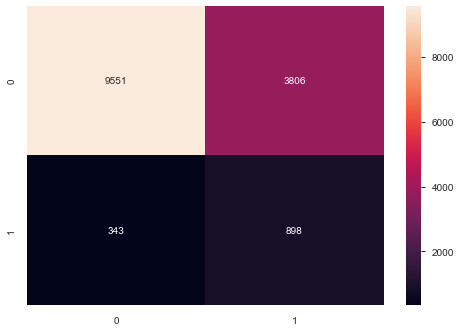

In [79]:
sns.heatmap(cm,fmt='1g',annot=True)

In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.72      0.82     13357
           1       0.19      0.72      0.30      1241

    accuracy                           0.72     14598
   macro avg       0.58      0.72      0.56     14598
weighted avg       0.90      0.72      0.78     14598



In [85]:
def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train_res, y_train_res.ravel()), ( X_test, y_test)]
    
    clf.fit(X_train_res, y_train_res.ravel(),
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    y_predict = clf.predict(X_test)
    y_score = clf.predict_proba(X_test)[:,1]
    accuracy = accuracy_score(y_test, y_predict>0.5)
    Roc_Auc_Score = roc_auc_score(y_test, y_score)
    print ("ROC-AUC Score:",Roc_Auc_Score)
    print ("SCORE:", accuracy)
    return {'loss': -Roc_Auc_Score, 'status': STATUS_OK }


In [86]:
trials = Trials()

In [87]:

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

  0%|                                                                          | 0/100 [00:00<?, ?trial/s, best loss=?]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7905421543158958                                                                                                     
SCORE:                                                                                                                 
0.9121797506507741                                                                                                     
  1%|▍                                              | 1/100 [00:01<03:03,  1.85s/trial, best loss: -0.7905421543158958]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.792170317911332                                                                                                      
SCORE:                                                                                                                 
0.9043704617070831                                                                                                     
  2%|▉                                               | 2/100 [00:03<02:58,  1.83s/trial, best loss: -0.792170317911332]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7930355428140031                                                                                                     
SCORE:                                                                                                                 
0.8939580764488286                                                                                                     
  3%|█▍                                             | 3/100 [00:05<02:51,  1.77s/trial, best loss: -0.7930355428140031]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7911228419675945                                                                                                     
SCORE:                                                                                                                 
0.9074530757638033                                                                                                     
  4%|█▉                                             | 4/100 [00:07<02:57,  1.85s/trial, best loss: -0.7930355428140031]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7921036855793699                                                                                                     
SCORE:                                                                                                                 
0.8962186600904234                                                                                                     
  5%|██▎                                            | 5/100 [00:09<02:58,  1.88s/trial, best loss: -0.7930355428140031]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7949572627039865                                                                                                     
SCORE:                                                                                                                 
0.8953281271407042                                                                                                     
  6%|██▊                                            | 6/100 [00:11<02:55,  1.87s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7926322497952918                                                                                                     
SCORE:                                                                                                                 
0.8927250308261405                                                                                                     
  7%|███▎                                           | 7/100 [00:12<02:47,  1.80s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7890104251094516                                                                                                     
SCORE:                                                                                                                 
0.9053979997259899                                                                                                     
  8%|███▊                                           | 8/100 [00:14<02:42,  1.77s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7913677436892788                                                                                                     
SCORE:                                                                                                                 
0.9058090149335526                                                                                                     
  9%|████▏                                          | 9/100 [00:16<02:41,  1.78s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7903716370806846                                                                                                     
SCORE:                                                                                                                 
0.9103986847513358                                                                                                     
 10%|████▌                                         | 10/100 [00:17<02:40,  1.78s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7925893565512674                                                                                                     
SCORE:                                                                                                                 
0.8875188381970133                                                                                                     
 11%|█████                                         | 11/100 [00:19<02:32,  1.72s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7920467057355145                                                                                                     
SCORE:                                                                                                                 
0.9008768324428004                                                                                                     
 12%|█████▌                                        | 12/100 [00:21<02:31,  1.73s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7903072972146478                                                                                                     
SCORE:                                                                                                                 
0.9171119331415263                                                                                                     
 13%|█████▉                                        | 13/100 [00:23<02:38,  1.82s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7913398419658451                                                                                                     
SCORE:                                                                                                                 
0.9048499794492396                                                                                                     
 14%|██████▍                                       | 14/100 [00:25<02:35,  1.81s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7920770205809748                                                                                                     
SCORE:                                                                                                                 
0.8956021372790793                                                                                                     
 15%|██████▉                                       | 15/100 [00:26<02:30,  1.77s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7921590365658571                                                                                                     
SCORE:                                                                                                                 
0.9052609946568023                                                                                                     
 16%|███████▎                                      | 16/100 [00:28<02:28,  1.77s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7913860230886309                                                                                                     
SCORE:                                                                                                                 
0.9121112481161803                                                                                                     
 17%|███████▊                                      | 17/100 [00:30<02:31,  1.82s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7921598509945412                                                                                                     
SCORE:                                                                                                                 
0.9003973147006439                                                                                                     
 18%|████████▎                                     | 18/100 [00:32<02:25,  1.77s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7918773045692407                                                                                                     
SCORE:                                                                                                                 
0.8861487875051377                                                                                                     
 19%|████████▋                                     | 19/100 [00:33<02:16,  1.68s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7915618190282756                                                                                                     
SCORE:                                                                                                                 
0.9045759693108645                                                                                                     
 20%|█████████▏                                    | 20/100 [00:35<02:17,  1.72s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7933235187638638                                                                                                     
SCORE:                                                                                                                 
0.8821756404986985                                                                                                     
 21%|█████████▋                                    | 21/100 [00:37<02:16,  1.73s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7926735141819483                                                                                                     
SCORE:                                                                                                                 
0.8797780517879161                                                                                                     
 22%|██████████                                    | 22/100 [00:38<02:09,  1.66s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7932644274382351                                                                                                     
SCORE:                                                                                                                 
0.8826551582408549                                                                                                     
 23%|██████████▌                                   | 23/100 [00:40<02:05,  1.63s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7933966665252979                                                                                                     
SCORE:                                                                                                                 
0.8832031785176051                                                                                                     
 24%|███████████                                   | 24/100 [00:41<02:02,  1.61s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7934172082265502                                                                                                     
SCORE:                                                                                                                 
0.8851212494862309                                                                                                     
 25%|███████████▌                                  | 25/100 [00:43<01:59,  1.59s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7919112994257917                                                                                                     
SCORE:                                                                                                                 
0.8993697766817372                                                                                                     
 26%|███████████▉                                  | 26/100 [00:45<02:02,  1.65s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7927488337532065                                                                                                     
SCORE:                                                                                                                 
0.8989587614741745                                                                                                     
 27%|████████████▍                                 | 27/100 [00:46<02:03,  1.69s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7914173936749779                                                                                                     
SCORE:                                                                                                                 
0.9003973147006439                                                                                                     
 28%|████████████▉                                 | 28/100 [00:48<02:03,  1.72s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7883184623682972                                                                                                     
SCORE:                                                                                                                 
0.8575832305795315                                                                                                     
 29%|█████████████▎                                | 29/100 [00:50<01:59,  1.68s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7850906100173402                                                                                                     
SCORE:                                                                                                                 
0.9154678723112755                                                                                                     
 30%|█████████████▊                                | 30/100 [00:52<02:06,  1.81s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7926844637231445                                                                                                     
SCORE:                                                                                                                 
0.896629675297986                                                                                                      
 31%|██████████████▎                               | 31/100 [00:54<02:02,  1.78s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7934056855688727                                                                                                     
SCORE:                                                                                                                 
0.8938210713796411                                                                                                     
 32%|██████████████▋                               | 32/100 [00:55<01:59,  1.76s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7918114565019372                                                                                                     
SCORE:                                                                                                                 
0.9032059186189889                                                                                                     
 33%|███████████████▏                              | 33/100 [00:57<01:58,  1.77s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7927641872421014                                                                                                     
SCORE:                                                                                                                 
0.9008768324428004                                                                                                     
 34%|███████████████▋                              | 34/100 [00:59<01:56,  1.76s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7909278013797869                                                                                                     
SCORE:                                                                                                                 
0.9037539388957392                                                                                                     
 35%|████████████████                              | 35/100 [01:01<01:54,  1.77s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7921577395127677                                                                                                     
SCORE:                                                                                                                 
0.9008768324428004                                                                                                     
 36%|████████████████▌                             | 36/100 [01:02<01:53,  1.77s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7926378301399786                                                                                                     
SCORE:                                                                                                                 
0.896013152486642                                                                                                      
 37%|█████████████████                             | 37/100 [01:04<01:51,  1.77s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7930293591888097                                                                                                     
SCORE:                                                                                                                 
0.8943005891217976                                                                                                     
 38%|█████████████████▍                            | 38/100 [01:06<01:50,  1.78s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7927301320574996                                                                                                     
SCORE:                                                                                                                 
0.8956706398136731                                                                                                     
 39%|█████████████████▉                            | 39/100 [01:08<01:51,  1.83s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7932500995262015                                                                                                     
SCORE:                                                                                                                 
0.8965611727633922                                                                                                     
 40%|██████████████████▍                           | 40/100 [01:10<01:51,  1.85s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7887395823259805                                                                                                     
SCORE:                                                                                                                 
0.8454582819564324                                                                                                     
 41%|██████████████████▊                           | 41/100 [01:12<01:47,  1.82s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.792358088969034                                                                                                      
SCORE:                                                                                                                 
0.8993012741471434                                                                                                     
 42%|███████████████████▎                          | 42/100 [01:14<01:56,  2.01s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7938525957682165                                                                                                     
SCORE:                                                                                                                 
0.8849842444170434                                                                                                     
 43%|███████████████████▊                          | 43/100 [01:16<01:54,  2.00s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7922315207187339                                                                                                     
SCORE:                                                                                                                 
0.8940950815180162                                                                                                     
 44%|████████████████████▏                         | 44/100 [01:18<01:48,  1.94s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7918130853593051                                                                                                     
SCORE:                                                                                                                 
0.9027264008768324                                                                                                     
 45%|████████████████████▋                         | 45/100 [01:20<01:43,  1.89s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.792676379764355                                                                                                      
SCORE:                                                                                                                 
0.9021783806000822                                                                                                     
 46%|█████████████████████▏                        | 46/100 [01:21<01:39,  1.85s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.790360476391311                                                                                                      
SCORE:                                                                                                                 
0.9121797506507741                                                                                                     
 47%|█████████████████████▌                        | 47/100 [01:23<01:38,  1.86s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7909524152244594                                                                                                     
SCORE:                                                                                                                 
0.9073160706946157                                                                                                     
 48%|██████████████████████                        | 48/100 [01:25<01:36,  1.86s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.791708838487752                                                                                                      
SCORE:                                                                                                                 
0.9042334566378956                                                                                                     
 49%|██████████████████████▌                       | 49/100 [01:27<01:38,  1.93s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.793575931327856                                                                                                      
SCORE:                                                                                                                 
0.88854637621592                                                                                                       
 50%|███████████████████████                       | 50/100 [01:29<01:32,  1.86s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7919684904178241                                                                                                     
SCORE:                                                                                                                 
0.8955336347444856                                                                                                     
 51%|███████████████████████▍                      | 51/100 [01:31<01:29,  1.82s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7929993459836027                                                                                                     
SCORE:                                                                                                                 
0.893204548568297                                                                                                      
 52%|███████████████████████▉                      | 52/100 [01:32<01:25,  1.79s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7931914003329023                                                                                                     
SCORE:                                                                                                                 
0.8924510206877655                                                                                                     
 53%|████████████████████████▍                     | 53/100 [01:34<01:23,  1.78s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7915612459117942                                                                                                     
SCORE:                                                                                                                 
0.8870393204548568                                                                                                     
 54%|████████████████████████▊                     | 54/100 [01:36<01:18,  1.70s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7938339845645856                                                                                                     
SCORE:                                                                                                                 
0.8920400054802028                                                                                                     
 55%|█████████████████████████▎                    | 55/100 [01:37<01:17,  1.71s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7905007391091128                                                                                                     
SCORE:                                                                                                                 
0.9075215782983971                                                                                                     
 56%|█████████████████████████▊                    | 56/100 [01:39<01:19,  1.81s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7919114200818929                                                                                                     
SCORE:                                                                                                                 
0.9044389642416769                                                                                                     
 57%|██████████████████████████▏                   | 57/100 [01:41<01:18,  1.82s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7897097780368131                                                                                                     
SCORE:                                                                                                                 
0.9156733799150568                                                                                                     
 58%|██████████████████████████▋                   | 58/100 [01:43<01:17,  1.85s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.791685431204093                                                                                                      
SCORE:                                                                                                                 
0.9026578983422386                                                                                                     
 59%|███████████████████████████▏                  | 59/100 [01:45<01:15,  1.83s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7924194727605882                                                                                                     
SCORE:                                                                                                                 
0.89724619810933                                                                                                       
 60%|███████████████████████████▌                  | 60/100 [01:47<01:11,  1.80s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7935323744752741                                                                                                     
SCORE:                                                                                                                 
0.8853952596246061                                                                                                     
 61%|████████████████████████████                  | 61/100 [01:48<01:09,  1.77s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7931231994716228                                                                                                     
SCORE:                                                                                                                 
0.8860802849705439                                                                                                     
 62%|████████████████████████████▌                 | 62/100 [01:50<01:10,  1.85s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7921929710943575                                                                                                     
SCORE:                                                                                                                 
0.8842307165365119                                                                                                     
 63%|████████████████████████████▉                 | 63/100 [01:52<01:11,  1.92s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7918542894179108                                                                                                     
SCORE:                                                                                                                 
0.8958761474174545                                                                                                     
 64%|█████████████████████████████▍                | 64/100 [01:54<01:09,  1.93s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7907298047174967                                                                                                     
SCORE:                                                                                                                 
0.912522263323743                                                                                                      
 65%|█████████████████████████████▉                | 65/100 [01:56<01:08,  1.94s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7890817027013151                                                                                                     
SCORE:                                                                                                                 
0.8544321139882176                                                                                                     
 66%|██████████████████████████████▎               | 66/100 [01:58<01:05,  1.94s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7912055818890847                                                                                                     
SCORE:                                                                                                                 
0.887587340731607                                                                                                      
 67%|██████████████████████████████▊               | 67/100 [02:00<01:03,  1.94s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7927705216874215                                                                                                     
SCORE:                                                                                                                 
0.8929305384299219                                                                                                     
 68%|███████████████████████████████▎              | 68/100 [02:02<00:59,  1.85s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7928047276921498                                                                                                     
SCORE:                                                                                                                 
0.8919030004110152                                                                                                     
 69%|███████████████████████████████▋              | 69/100 [02:04<00:57,  1.87s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7934387755046638                                                                                                     
SCORE:                                                                                                                 
0.8988902589395807                                                                                                     
 70%|████████████████████████████████▏             | 70/100 [02:06<00:57,  1.92s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7910341898971389                                                                                                     
SCORE:                                                                                                                 
0.9053294971913961                                                                                                     
 71%|████████████████████████████████▋             | 71/100 [02:08<00:57,  2.00s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7919835121024404                                                                                                     
SCORE:                                                                                                                 
0.8858062748321688                                                                                                     
 72%|█████████████████████████████████             | 72/100 [02:10<00:51,  1.86s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7932888602987553                                                                                                     
SCORE:                                                                                                                 
0.8927250308261405                                                                                                     
 73%|█████████████████████████████████▌            | 73/100 [02:11<00:47,  1.77s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7888683525501301                                                                                                     
SCORE:                                                                                                                 
0.8461433073023702                                                                                                     
 74%|██████████████████████████████████            | 74/100 [02:13<00:46,  1.78s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7912355950942919                                                                                                     
SCORE:                                                                                                                 
0.9082066036443348                                                                                                     
 75%|██████████████████████████████████▌           | 75/100 [02:15<00:47,  1.89s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7916564134117221                                                                                                     
SCORE:                                                                                                                 
0.9012193451157693                                                                                                     
 76%|██████████████████████████████████▉           | 76/100 [02:17<00:46,  1.93s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7913551652907146                                                                                                     
SCORE:                                                                                                                 
0.9040279490341142                                                                                                     
 77%|███████████████████████████████████▍          | 77/100 [02:19<00:45,  1.98s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7923946176037131                                                                                                     
SCORE:                                                                                                                 
0.896355665159611                                                                                                      
 78%|███████████████████████████████████▉          | 78/100 [02:21<00:43,  1.97s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7928157073973712                                                                                                     
SCORE:                                                                                                                 
0.8929305384299219                                                                                                     
 79%|████████████████████████████████████▎         | 79/100 [02:23<00:39,  1.89s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7916612094917501                                                                                                     
SCORE:                                                                                                                 
0.8870393204548568                                                                                                     
 80%|████████████████████████████████████▊         | 80/100 [02:24<00:35,  1.78s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7923437912210258                                                                                                     
SCORE:                                                                                                                 
0.8987532538703932                                                                                                     
 81%|█████████████████████████████████████▎        | 81/100 [02:26<00:33,  1.77s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7935694762264346                                                                                                     
SCORE:                                                                                                                 
0.8929305384299219                                                                                                     
 82%|█████████████████████████████████████▋        | 82/100 [02:28<00:31,  1.72s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7914751276194665                                                                                                     
SCORE:                                                                                                                 
0.9001233045622689                                                                                                     
 83%|██████████████████████████████████████▏       | 83/100 [02:30<00:29,  1.73s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.789063242317811                                                                                                      
SCORE:                                                                                                                 
0.8949856144677353                                                                                                     
 84%|██████████████████████████████████████▋       | 84/100 [02:31<00:27,  1.71s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.792426169174212                                                                                                      
SCORE:                                                                                                                 
0.9037539388957392                                                                                                     
 85%|███████████████████████████████████████       | 85/100 [02:33<00:26,  1.74s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7925327085116907                                                                                                     
SCORE:                                                                                                                 
0.8971776955747363                                                                                                     
 86%|███████████████████████████████████████▌      | 86/100 [02:35<00:24,  1.73s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7884451814387239                                                                                                     
SCORE:                                                                                                                 
0.8448417591450884                                                                                                     
 87%|████████████████████████████████████████      | 87/100 [02:36<00:21,  1.62s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7938897880114528                                                                                                     
SCORE:                                                                                                                 
0.8969036854363611                                                                                                     
 88%|████████████████████████████████████████▍     | 88/100 [02:38<00:19,  1.66s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7926605738150801                                                                                                     
SCORE:                                                                                                                 
0.8929990409645157                                                                                                     
 89%|████████████████████████████████████████▉     | 89/100 [02:39<00:18,  1.67s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7936755932675585                                                                                                     
SCORE:                                                                                                                 
0.8947801068639539                                                                                                     
 90%|█████████████████████████████████████████▍    | 90/100 [02:41<00:16,  1.68s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7929257457617886                                                                                                     
SCORE:                                                                                                                 
0.8942320865872038                                                                                                     
 91%|█████████████████████████████████████████▊    | 91/100 [02:43<00:15,  1.71s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7926296556891131                                                                                                     
SCORE:                                                                                                                 
0.8929990409645157                                                                                                     
 92%|██████████████████████████████████████████▎   | 92/100 [02:45<00:13,  1.70s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7935912244887001                                                                                                     
SCORE:                                                                                                                 
0.8902589395807645                                                                                                     
 93%|██████████████████████████████████████████▊   | 93/100 [02:46<00:11,  1.68s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7933597457582895                                                                                                     
SCORE:                                                                                                                 
0.8950541170023291                                                                                                     
 94%|███████████████████████████████████████████▏  | 94/100 [02:48<00:10,  1.71s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.792668597445819                                                                                                      
SCORE:                                                                                                                 
0.8931360460337032                                                                                                     
 95%|███████████████████████████████████████████▋  | 95/100 [02:50<00:08,  1.71s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7925610928595298                                                                                                     
SCORE:                                                                                                                 
0.8957391423482669                                                                                                     
 96%|████████████████████████████████████████████▏ | 96/100 [02:52<00:07,  1.78s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7947198718246105                                                                                                     
SCORE:                                                                                                                 
0.8986847513357994                                                                                                     
 97%|████████████████████████████████████████████▌ | 97/100 [02:54<00:05,  1.85s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7945396417732418                                                                                                     
SCORE:                                                                                                                 
0.8989587614741745                                                                                                     
 98%|█████████████████████████████████████████████ | 98/100 [02:55<00:03,  1.82s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7945396417732418                                                                                                     
SCORE:                                                                                                                 
0.8989587614741745                                                                                                     
 99%|█████████████████████████████████████████████▌| 99/100 [02:57<00:01,  1.80s/trial, best loss: -0.7949572627039865]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



ROC-AUC Score:                                                                                                         
0.7926436216328425                                                                                                     
SCORE:                                                                                                                 
0.8990957665433621                                                                                                     
100%|█████████████████████████████████████████████| 100/100 [02:59<00:00,  1.80s/trial, best loss: -0.7949572627039865]


In [88]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.8665226489946941, 'gamma': 5.17723378258581, 'max_depth': 13.0, 'min_child_weight': 10.0, 'reg_alpha': 180.0, 'reg_lambda': 0.44356042767584114}


In [89]:
xgb_model=xgb.XGBClassifier(n_estimators = space['n_estimators'], max_depth = 13, gamma = 5.17723378258581, reg_lambda = 0.44356042767584114,
                            reg_alpha = 180.0, min_child_weight=10.0,colsample_bytree = 0.8665226489946941)
    

In [90]:
xgb_model.fit(X_train_res,y_train_res.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8665226489946941,
              gamma=5.17723378258581, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=13, min_child_weight=10.0,
              missing=nan, monotone_constraints='()', n_estimators=300,
              n_jobs=0, num_parallel_tree=1, random_state=0, reg_alpha=180.0,
              reg_lambda=0.44356042767584114, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [91]:
y_predict=xgb_model.predict(X_test)

In [92]:
cm=confusion_matrix(y_test, y_predict)

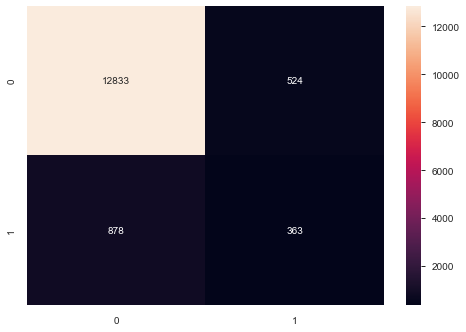

In [93]:
sns.heatmap(cm,annot=True,fmt='d')

In [94]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     13357
           1       0.41      0.29      0.34      1241

    accuracy                           0.90     14598
   macro avg       0.67      0.63      0.64     14598
weighted avg       0.89      0.90      0.90     14598



In [95]:
test=test.astype('int').values

In [96]:
y_predict = xgb_model.predict(test)

In [97]:
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [98]:
y_predict.shape

(23490,)

In [100]:
predict=pd.DataFrame(data=y_predict)

In [101]:
predict.to_csv('solution2.csv',index=False)